In [1]:
import pandas as pd
import json
from datetime import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
conversations = pd.read_csv("../../datasets/AWS-CSV-Exports/conversations.csv", sep=";")
conversations.head()

,ID,UserID,PeerID,Messages,AdvisorStatus,ConversationStatus,CreatedAt,UpdatedAt
0,1,2,1,"[{""message"": ""Hello"", ""senderID"": 1, ""createdA...","[{""Status"": ""up"", ""CreatedAt"": 1616824877980},...","[{""Status"": ""up"", ""CreatedAt"": 1616824878883}]",2021-03-27 06:01:48,2021-03-27 06:01:48
1,2,1,2,"[{""message"": ""Hello"", ""senderID"": 1, ""createdA...","[{""Status"": ""up"", ""CreatedAt"": 1616824891774}]","[{""Status"": ""down"", ""CreatedAt"": 1616824893677}]",2021-03-27 06:01:53,2021-03-27 06:01:53
2,3,3,1,"[{""message"": ""Hello there"", ""senderID"": 1, ""cr...",[],[],2021-03-27 06:07:47,2021-03-27 06:07:47
3,4,1,3,"[{""message"": ""Hello there"", ""senderID"": 1, ""cr...","[{""Status"": ""up"", ""CreatedAt"": 1616825208684}]","[{""Status"": ""up"", ""CreatedAt"": 1616825210420}]",2021-03-27 06:07:52,2021-03-27 06:07:52
4,5,1,4,"[{""message"": ""Hey"", ""senderID"": 1, ""createdAt""...",[],[],2021-03-27 06:16:08,2021-03-27 06:16:08


In [3]:
bot_click_counts = { 'Blenderbot': 0, 'DialoGPT': 0 }
messages = conversations["Messages"]
for message in messages:

    message = json.loads(message)
    for m in message:
        if 'nameOfBot' in m:
            bot_click_counts[m['nameOfBot']] = bot_click_counts[m['nameOfBot']] + 1
bot_click_counts

{'Blenderbot': 49, 'DialoGPT': 33}

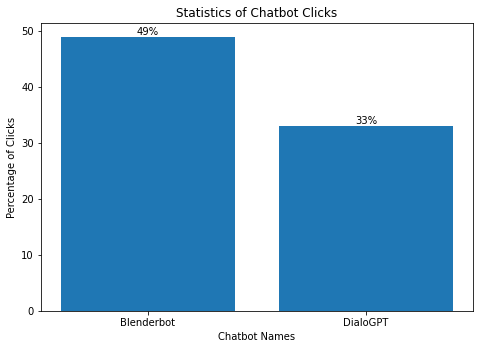

In [4]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_axes([0,0,1,1])
x_axis = list(bot_click_counts.keys())
y_axis = list(bot_click_counts.values())

ax.bar(x_axis,y_axis)
for i in range(len(y_axis)):
    plt.annotate(str(y_axis[i])+'%', xy=(x_axis[i],y_axis[i]), ha='center', va='bottom')

    
plt.xlabel("Chatbot Names")
plt.ylabel("Percentage of Clicks")
plt.title("Statistics of Chatbot Clicks")
plt.show()

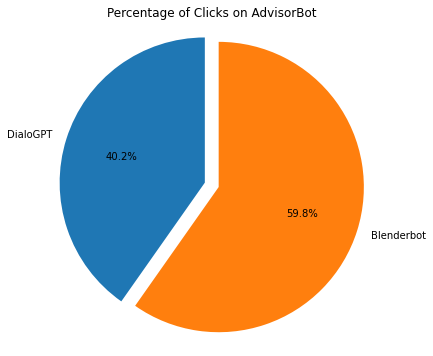

In [5]:
plt.figure(figsize=(6, 6))
plt.pie(list(reversed(list(bot_click_counts.values()))), explode=(0.1,0), 
        labels=list(reversed(list(bot_click_counts.keys()))), 
        autopct='%1.1f%%',shadow=False, startangle=90)
plt.axis('equal')
plt.title('Percentage of Clicks on AdvisorBot')
plt.show()

## Message Delay in Seconds

In [6]:
delay = []

for message in messages:

    message = json.loads(message)
    i = 0
    for m in message:
        if 'nameOfBot' in m:
            if i - 1 > 0:
                created_at_prev = message[i - 1]['createdAt'] / 1000
                created_at_curr = m['createdAt'] / 1000
                delayed = round(created_at_curr - created_at_prev, 2)
                delay.append(delayed)
        i += 1

In [7]:
mean = sum(delay) / len(delay)
max_delay = max(delay)
min_delay = min(delay)
print("Mean {}, Max {} and Min {} values for delay".format(mean, max_delay, min_delay))

Mean 19.59, Max 69.62 and Min 7.66 values for delay


In [8]:
np.array(delay)

array([12.14, 14.78, 10.69, 10.94, 31.17, 51.67, 12.46, 12.56, 65.36,
       10.82, 26.38,  7.66, 39.11, 27.15, 69.62, 17.55, 15.96, 15.36,
       11.07, 19.86, 24.54, 18.23, 17.95, 12.98,  7.69, 15.44, 13.52,
       14.4 ,  9.7 , 16.72, 16.28, 10.65, 12.67, 19.65, 20.17, 25.96,
       22.83, 12.81, 19.  , 41.16,  9.48, 34.55, 34.43, 23.68, 23.06,
       10.94, 10.64, 19.49, 28.7 , 18.56,  9.32, 28.37, 24.23,  9.62,
       12.75, 32.32, 10.65, 12.13, 17.13, 11.93, 32.07,  8.59, 12.18,
       12.78, 10.17, 22.29, 14.84, 12.21,  8.26,  9.22, 31.64])

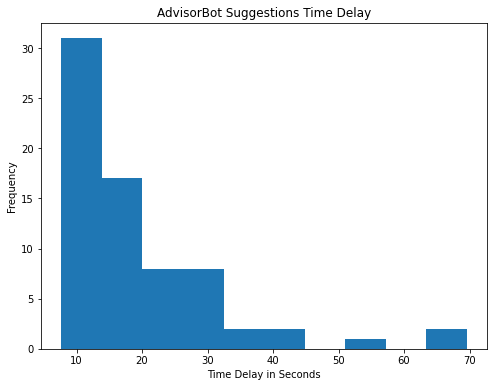

In [9]:
plt.figure(figsize=(8, 6))
plt.hist(delay)
plt.xlabel("Time Delay in Seconds")
plt.ylabel("Frequency")
plt.title("AdvisorBot Suggestions Time Delay")
plt.show()

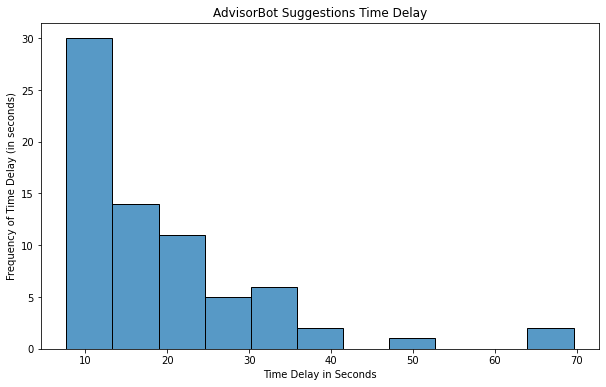

In [10]:
plt.figure(figsize=(10, 6))
fig = sns.histplot(data=delay)
fig.set(xlabel='Time Delay in Seconds', ylabel='Frequency of Time Delay (in seconds)', title='AdvisorBot Suggestions Time Delay')
plt.show(fig)

/Users/tejas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


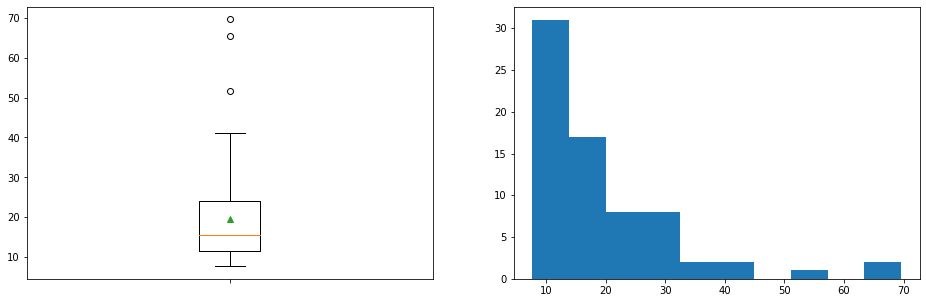

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize =(16, 5))
ax1.boxplot(delay, showmeans=True)
ax2.hist(delay)
ax1.set_xticklabels([''])
fig.show()

In [12]:
fig = plt.figure(figsize =(10, 7))

plt.show()

<Figure size 720x504 with 0 Axes>

## Conversation Status Analysis

In [13]:
conversations.head()["ConversationStatus"]

0      [{"Status": "up", "CreatedAt": 1616824878883}]
1    [{"Status": "down", "CreatedAt": 1616824893677}]
2                                                  []
3      [{"Status": "up", "CreatedAt": 1616825210420}]
4                                                  []
Name: ConversationStatus, dtype: object

In [14]:
conversations.head()["Messages"]

0    [{"message": "Hello", "senderID": 1, "createdA...
1    [{"message": "Hello", "senderID": 1, "createdA...
2    [{"message": "Hello there", "senderID": 1, "cr...
3    [{"message": "Hello there", "senderID": 1, "cr...
4    [{"message": "Hey", "senderID": 1, "createdAt"...
Name: Messages, dtype: object

In [40]:
status = { 'up': 0, 'down': 0 }
status_messages = { 'up': 0, 'down': 0 }
up_messages_bot_hist = []
down_messages_bot_hist = []
conv_up_counts = 0
conv_down_counts = 0
conv_ups = 0
conv_downs = 0
conv_ups_lst = []
conv_downs_lst = []

messages_status = {}
total = 0
count = 0
for i, row in conversations.iterrows():
    message = []
    message = json.loads(row["Messages"])
    conversationStatus = json.loads(row["ConversationStatus"])
    
    
    if len(conversationStatus) > 0:
        
        for c in conversationStatus:
            total = total + 1
            status[c['Status']] = status[c['Status']] + 1
            created_time = c['CreatedAt']/1000
            if c['Status'] == 'up':
                conv_up_counts += 1
            else:
                conv_down_counts += 1

            i = 0
            for m in message:
                
                m_time = m['createdAt']/1000
                diff = created_time - m_time
                
                
                if i - 1 >= 0:
                    diff_with_last = created_time - (message[i - 1]['createdAt']/1000)

                    if diff < 0 and diff_with_last > 0:
                        count = count + 1
                        last_message = message[i - 1]
                        
                        messages_status[last_message['message']] = c['Status']
                        
                        
                        if 'nameOfBot' in last_message:
                            j = i - 1
                            conv_ups = 0
                            conv_downs = 0
                            while j >= 0:
                                new_message = message[j]['message']
                                
                                if c["Status"] == 'up':
                                    conv_ups += 1
                                    up_messages_bot_hist.append(new_message)
                                elif c["Status"] == "down":
                                    conv_downs += 1
                                    down_messages_bot_hist.append(new_message)
                                j = j - 1
                            conv_ups_lst.append(conv_ups)
                            conv_downs_lst.append(conv_downs)
                        break

                    elif (diff > 0) and (i + 1 == len(message)):
                        count = count + 1
                        messages_status[m['message']] = c['Status']
                        if 'nameOfBot' in last_message:
                            j = i - 1
                            conv_ups = 0
                            conv_downs = 0
                            while j >= 0:
                                new_message = message[j]['message']
                                
                                if c["Status"] == 'up':
                                    conv_ups += 1
                                    up_messages_bot_hist.append(new_message)
                                elif c["Status"] == "down":
                                    conv_downs += 1
                                    down_messages_bot_hist.append(new_message)
                                j = j - 1
                            conv_ups_lst.append(conv_ups)
                            conv_downs_lst.append(conv_downs)
                i = i + 1

In [41]:
print('Conversation Up Counts', conv_up_counts)
print('Conversation Down Counts', conv_down_counts)
print('Conversation Up List', conv_ups_lst)
print('Conversation Down List', conv_downs_lst)

Conversation Up Counts 11
Conversation Down Counts 3
Conversation Up List [2, 24, 5, 16, 7, 36, 7]
Conversation Down List [0, 0, 0, 0, 0, 0, 0]


In [42]:
df_msg_hist = pd.DataFrame([['Upvote', c] for c in conv_ups_lst]+[['Downvote', c] for c in conv_downs_lst], columns = ['Status', 'Counts'])
df_msg_hist

,Status,Counts
0,Upvote,2
1,Upvote,24
2,Upvote,5
3,Upvote,16
4,Upvote,7
5,Upvote,36
6,Upvote,7
7,Downvote,0
8,Downvote,0
9,Downvote,0


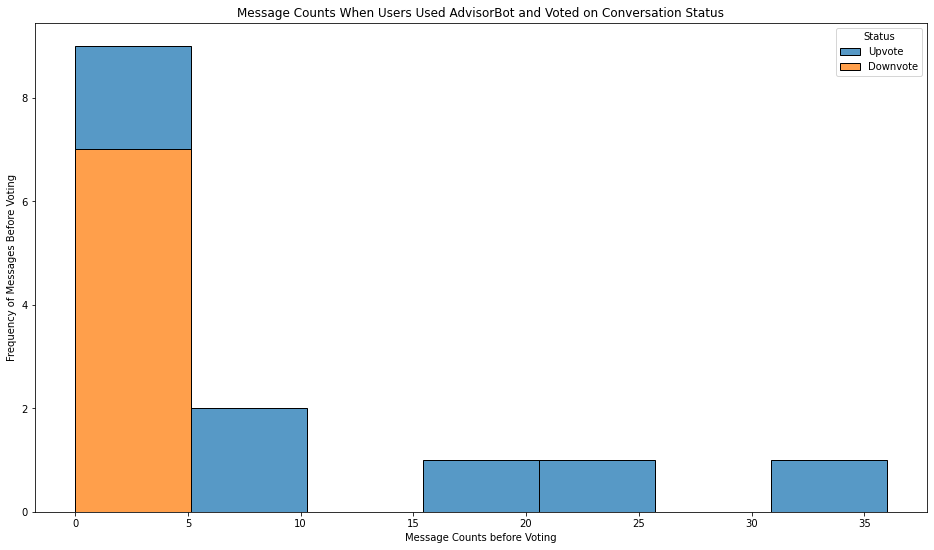

In [46]:
plt.figure(figsize=(16,9))
f = sns.histplot(data=df_msg_hist, x="Counts", hue="Status", multiple="stack")
f.set(xlabel='Message Counts before Voting', ylabel='Frequency of Messages Before Voting', title='Message Counts When Users Used AdvisorBot and Voted on Conversation Status')
plt.show(f)

/Users/tejas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


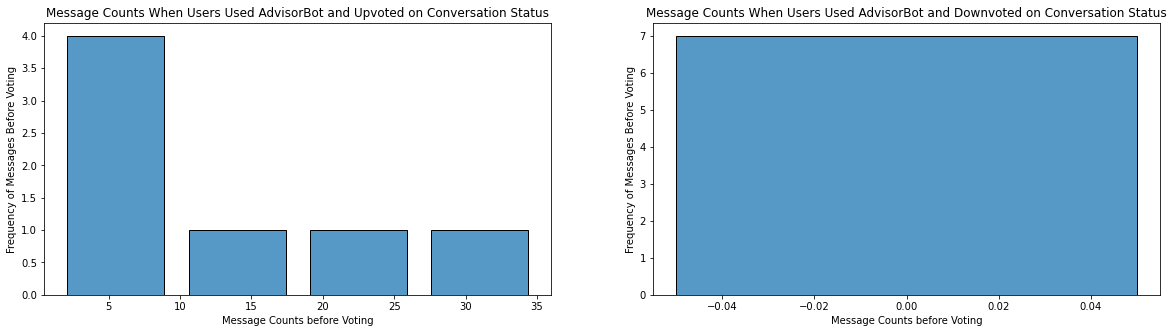

In [19]:
plot_size = (20,5)
fig, ax = plt.subplots(1,2, figsize=plot_size)

f1 = sns.histplot(data=conv_ups_lst, ax=ax[0], shrink=.8)
f1.set(xlabel='Message Counts before Voting', ylabel='Frequency of Messages Before Voting', title='Message Counts When Users Used AdvisorBot and Upvoted on Conversation Status')

f2 = sns.histplot(data=conv_downs_lst, ax=ax[1], shrink=0.1)
f2.set(xlabel='Message Counts before Voting', ylabel='Frequency of Messages Before Voting', title='Message Counts When Users Used AdvisorBot and Downvoted on Conversation Status')

fig.show()

### Messages with upvotes and downvotes

In [20]:
messages_status

{'Hello': 'up',
 'hello, how are you today? i just got back from a long day at the office.': 'down',
 'what kind of dogs do you like? there are so many different kinds of dogs out there.': 'up',
 'Hey, how are you?': 'up',
 'Do you know today is a big indian festival?': 'up',
 "have you ever been to a holi festival? it's a festival in which a group of people attend a festival.": 'up',
 "that's good to hear. what are you going to do with the rest of your day?": 'up',
 "i'm not sure what that's supposed to mean. i don't know what that means.": 'up',
 'I like blue.': 'up',
 'I agree. I love it.': 'up',
 "i'm good. just got back from a long day at work as well. what do you do for work?": 'up',
 'Autobots unite!': 'down',
 'Optimus prime': 'down',
 'hello, what are you up to today? i just got back from a long day at work.': 'up'}

### Bot messages with upvote history

In [21]:
up_messages_bot_hist

['Hey, how are you?',
 'Hey',
 "have you ever been to a holi festival? it's a festival in which a group of people attend a festival.",
 'Holi - Festivals of color',
 "no i don't know much about indian festivals. what's the name of it?",
 'I like to play a lot of games. I like to play games like Diablo, League of Legends, and Overwatch.',
 'Do you know today is a big indian festival?',
 "what kind of video games do you like to play? i'm not very good at it either.",
 "i like to read and play video games. i'm not very good at it though.",
 '19 degree celsius',
 'What are your interests?',
 "The weather's been okay. ",
 'I know Tejas, yes.',
 'And I am guessing again that you know Tejas?',
 'Yes I am',
 'Are you in Chicago as well? ',
 'I guessed ',
 "How's the weather?",
 "I'm in US",
 "Yeah, it's lovely",
 "That's nice",
 "So it's a morning for me haha",
 "that's cool. what kind of business are you going to do in austrailia?",
 'I am in Aus at the moment for a business trip....',
 'How 

### Bot messages with upvote history

In [22]:
down_messages_bot_hist

[]

In [23]:
### History of bot suggested message 

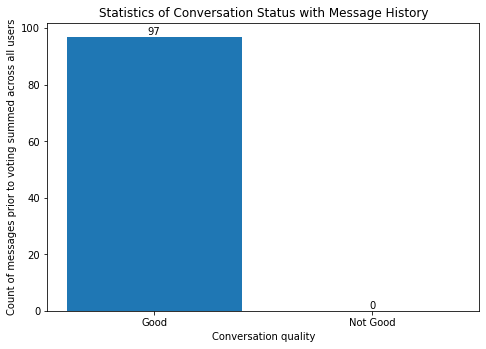

In [24]:
x = ['Good', 'Not Good']
y = [len(up_messages_bot_hist), len(down_messages_bot_hist)]

fig = plt.figure(figsize=(6, 4))
ax = fig.add_axes([0,0,1,1])
x_axis = x
y_axis = y

ax.bar(x_axis,y_axis)
for i in range(len(y_axis)):
    plt.annotate(str(y_axis[i]), xy=(x_axis[i],y_axis[i]), ha='center', va='bottom')

    
plt.xlabel("Conversation quality")
plt.ylabel("Count of messages prior to voting summed across all users")
plt.title("Statistics of Conversation Status with Message History")
plt.show()

### Word cloud of upvoted history messages for bot suggested messages, since downvotes are zero

In [25]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

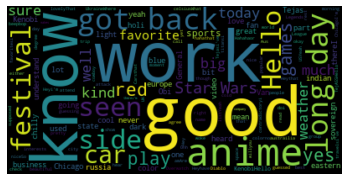

In [26]:
# Start with one review:
text = "".join(up_messages_bot_hist)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Advisorbot Status Analysis

In [27]:
status = { 'up': 0, 'down': 0 }
status_messages = { 'up': 0, 'down': 0 }
up_messages_bot_hist = []
down_messages_bot_hist = []
conv_up_counts = 0
conv_down_counts = 0
conv_ups = 0
conv_downs = 0
conv_ups_lst = []
conv_downs_lst = []


messages_status = {}
total = 0
count = 0
for i, row in conversations.iterrows():
    message = []
    message = json.loads(row["Messages"])
    conversationStatus = json.loads(row["AdvisorStatus"])
    
    
    if len(conversationStatus) > 0:
        
        for c in conversationStatus:
            total = total + 1
            status[c['Status']] = status[c['Status']] + 1
            created_time = c['CreatedAt']/1000
            if c['Status'] == 'up':
                conv_up_counts += 1
            else:
                conv_down_counts += 1



            i = 0
            for m in message:
                
                m_time = m['createdAt']/1000
                diff = created_time - m_time
                
                
                if i - 1 >= 0:
                    diff_with_last = created_time - (message[i - 1]['createdAt']/1000)

                    if diff < 0 and diff_with_last > 0:
                        count = count + 1
                        last_message = message[i - 1]

                        messages_status[last_message['message']] = c['Status']
                        

                        if 'nameOfBot' in last_message:
                            j = i - 1
                            conv_ups = 0
                            conv_downs = 0
                            while j >= 0:
                                new_message = message[j]['message']
                                
                                if c["Status"] == 'up':
                                    conv_ups += 1
                                    up_messages_bot_hist.append(new_message)
                                elif c["Status"] == "down":
                                    conv_downs += 1
                                    down_messages_bot_hist.append(new_message)
                                j = j - 1
                            conv_ups_lst.append(conv_ups)
                            conv_downs_lst.append(conv_ups)
                        break

                    elif (diff > 0) and (i + 1 == len(message)):
                        count = count + 1
                        messages_status[m['message']] = c['Status']
                        if 'nameOfBot' in last_message:
                            j = i - 1
                            conv_ups = 0
                            conv_downs = 0
                            while j >= 0:
                                new_message = message[j]['message']
                                
                                if c["Status"] == 'up':
                                    conv_ups += 1
                                    up_messages_bot_hist.append(new_message)
                                elif c["Status"] == "down":
                                    conv_downs += 1
                                    down_messages_bot_hist.append(new_message)
                                j = j - 1
                            conv_ups_lst.append(conv_ups)
                            conv_downs_lst.append(conv_downs)
                i = i + 1

In [28]:
print('Conversation Up Counts', conv_up_counts)
print('Conversation Down Counts', conv_down_counts)
print('Conversation Up List', conv_ups_lst)
print('Conversation Down List', conv_downs_lst)

Conversation Up Counts 17
Conversation Down Counts 6
Conversation Up List [2, 19, 24, 5, 16, 7, 0, 7, 9, 31, 17]
Conversation Down List [2, 19, 24, 5, 16, 7, 0, 7, 9, 31, 0]


In [29]:
df_msg_hist = pd.DataFrame([['Upvote', c] for c in conv_ups_lst]+[['Downvote', c] for c in conv_downs_lst], columns = ['Status', 'Counts'])
df_msg_hist

,Status,Counts
0,Upvote,2
1,Upvote,19
2,Upvote,24
3,Upvote,5
4,Upvote,16
5,Upvote,7
6,Upvote,0
7,Upvote,7
8,Upvote,9
9,Upvote,31


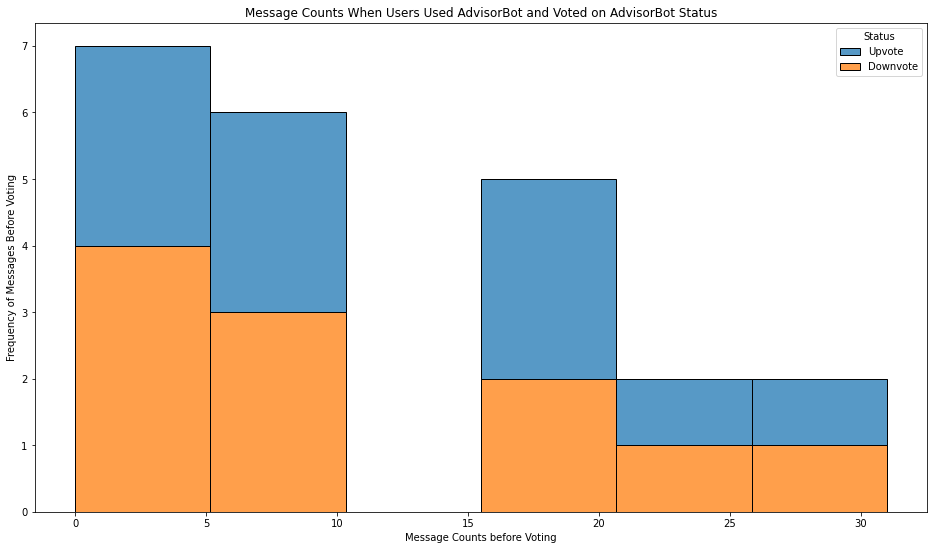

In [30]:
plt.figure(figsize=(16,9))
f = sns.histplot(data=df_msg_hist, x="Counts", hue="Status", multiple="stack")
f.set(xlabel='Message Counts before Voting', ylabel='Frequency of Messages Before Voting', title='Message Counts When Users Used AdvisorBot and Voted on AdvisorBot Status')
plt.show(f)

/Users/tejas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


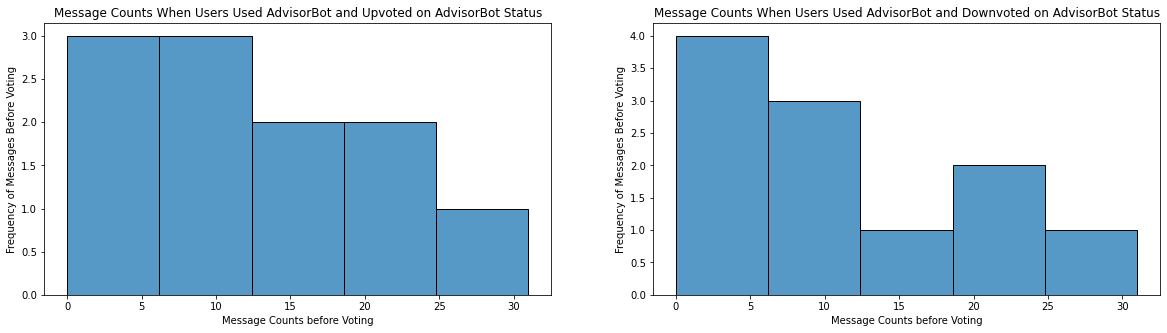

In [31]:
plot_size = (20,5)
fig, ax = plt.subplots(1,2, figsize=plot_size)

f1 = sns.histplot(data=conv_ups_lst, ax=ax[0])
f1.set(xlabel='Message Counts before Voting', ylabel='Frequency of Messages Before Voting', title='Message Counts When Users Used AdvisorBot and Upvoted on AdvisorBot Status')

f2 = sns.histplot(data=conv_downs_lst, ax=ax[1])
f2.set(xlabel='Message Counts before Voting', ylabel='Frequency of Messages Before Voting', title='Message Counts When Users Used AdvisorBot and Downvoted on AdvisorBot Status')

fig.show()

/Users/tejas/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


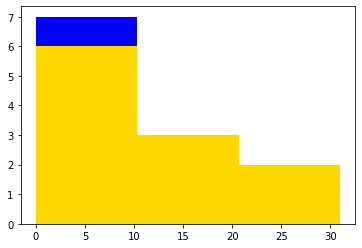

In [32]:
sns.distplot(conv_downs_lst, color="blue", kde=False, hist_kws={"alpha":1})
sns.distplot(conv_ups_lst, color="gold", kde=False, hist_kws={"alpha": 1})
plt.show()

### Messages with upvotes and downvotes

In [33]:
messages_status

{'Hello': 'up',
 "I'm doing well, thanks for asking.": 'down',
 'hello, how are you today? i just got back from a long day at the office.': 'up',
 'what kind of dogs do you like? there are so many different kinds of dogs out there.': 'up',
 'Hey, how are you?': 'up',
 "what kind of video games do you like to play? i'm not very good at it either.": 'up',
 "have you ever been to a holi festival? it's a festival in which a group of people attend a festival.": 'up',
 "that's good to hear. what are you going to do with the rest of your day?": 'up',
 "i'm not sure what that's supposed to mean. i don't know what that means.": 'up',
 'I like blue.': 'up',
 'Tell me the tragedy of Darth plaguies the wise': 'up',
 "i'm good. just got back from a long day at work as well. what do you do for work?": 'up',
 'I agree. I love it.': 'down',
 "that's cool. what kind of cars do you work on? ": 'up',
 "It's about space travels": 'down',
 "yeah, i'm used to it too. it's a bit chilly here too.": 'up',
 'De

### Bot messages with upvote history

In [34]:
up_messages_bot_hist

['Hey, how are you?',
 'Hey',
 "what kind of video games do you like to play? i'm not very good at it either.",
 "i like to read and play video games. i'm not very good at it though.",
 '19 degree celsius',
 'What are your interests?',
 "The weather's been okay. ",
 'I know Tejas, yes.',
 'And I am guessing again that you know Tejas?',
 'Yes I am',
 'Are you in Chicago as well? ',
 'I guessed ',
 "How's the weather?",
 "I'm in US",
 "Yeah, it's lovely",
 "That's nice",
 "So it's a morning for me haha",
 "that's cool. what kind of business are you going to do in austrailia?",
 'I am in Aus at the moment for a business trip....',
 'How are you?',
 'Hey',
 "have you ever been to a holi festival? it's a festival in which a group of people attend a festival.",
 'Holi - Festivals of color',
 "no i don't know much about indian festivals. what's the name of it?",
 'I like to play a lot of games. I like to play games like Diablo, League of Legends, and Overwatch.',
 'Do you know today is a big 

### Bot messages with upvote history

In [35]:
up_messages_bot_hist

['Hey, how are you?',
 'Hey',
 "what kind of video games do you like to play? i'm not very good at it either.",
 "i like to read and play video games. i'm not very good at it though.",
 '19 degree celsius',
 'What are your interests?',
 "The weather's been okay. ",
 'I know Tejas, yes.',
 'And I am guessing again that you know Tejas?',
 'Yes I am',
 'Are you in Chicago as well? ',
 'I guessed ',
 "How's the weather?",
 "I'm in US",
 "Yeah, it's lovely",
 "That's nice",
 "So it's a morning for me haha",
 "that's cool. what kind of business are you going to do in austrailia?",
 'I am in Aus at the moment for a business trip....',
 'How are you?',
 'Hey',
 "have you ever been to a holi festival? it's a festival in which a group of people attend a festival.",
 'Holi - Festivals of color',
 "no i don't know much about indian festivals. what's the name of it?",
 'I like to play a lot of games. I like to play games like Diablo, League of Legends, and Overwatch.',
 'Do you know today is a big 

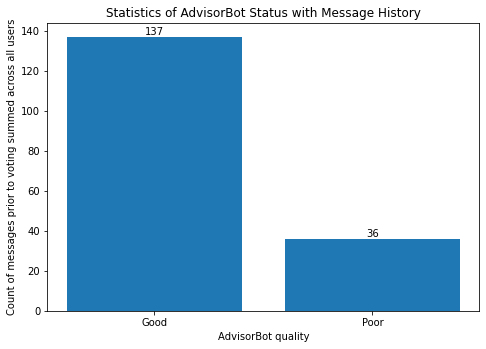

In [36]:
x = ['Good', 'Poor']
y = [len(up_messages_bot_hist), len(down_messages_bot_hist)]

fig = plt.figure(figsize=(6, 4))
ax = fig.add_axes([0,0,1,1])
x_axis = x
y_axis = y

ax.bar(x_axis,y_axis)
for i in range(len(y_axis)):
    plt.annotate(str(y_axis[i]), xy=(x_axis[i],y_axis[i]), ha='center', va='bottom')

    
plt.xlabel("AdvisorBot quality")
plt.ylabel("Count of messages prior to voting summed across all users")
plt.title("Statistics of AdvisorBot Status with Message History")
plt.show()

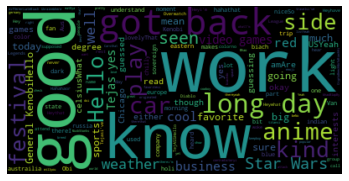

In [37]:
# Start with one review:
text = "".join(up_messages_bot_hist)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

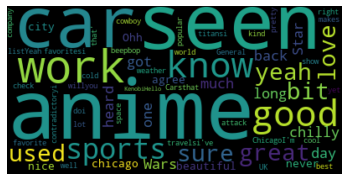

In [38]:
# Start with one review:
text = "".join(down_messages_bot_hist)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()